<a href="https://colab.research.google.com/github/bvdsb01/Project-Case-Scenario---Coursera/blob/main/Project%20Case%20Scenario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 1: Familiarize with the dataset**

In [5]:
import pandas as pd

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
print(boston_df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


In [6]:
print(boston_df.describe())

       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

In [7]:
print(boston_df.isnull().sum())

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64


## **Task 2: Generate Descriptive Statistics and Visualizations**

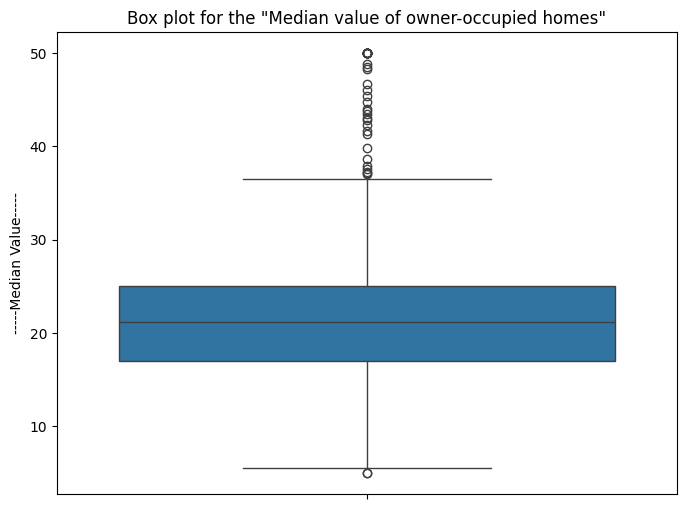

In [42]:
# For the "Median value of owner-occupied homes" provide a boxplot

import matplotlib.pyplot as plt
import seaborn as sns

boston = boston_df.copy()

plt.figure(figsize = (8,6))
sns.boxplot(y="MEDV", data = boston)
plt.title('Box plot for the "Median value of owner-occupied homes"')
plt.ylabel('-----Median Value-----')
plt.show()

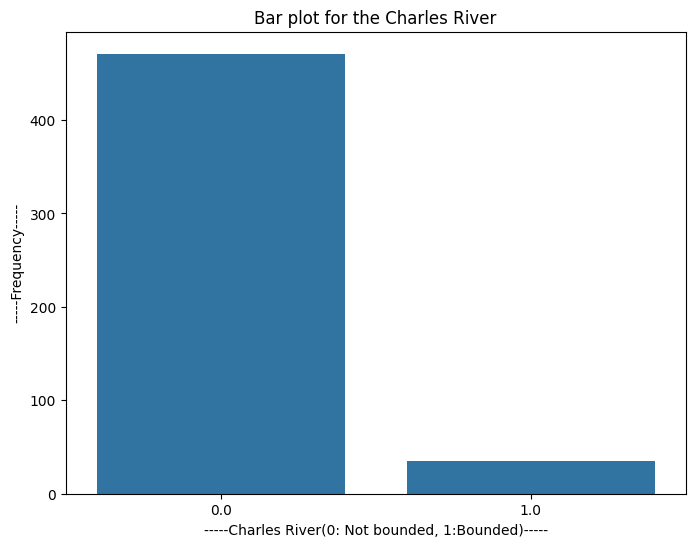

In [33]:
# Provide a  bar plot for the Charles river variable

plt.figure(figsize = (8,6))
sns.countplot(x="CHAS", data = boston)
plt.title('Bar plot for the Charles River')
plt.xlabel('-----Charles River(0: Not bounded, 1:Bounded)-----')
plt.ylabel('-----Frequency-----')
plt.show()

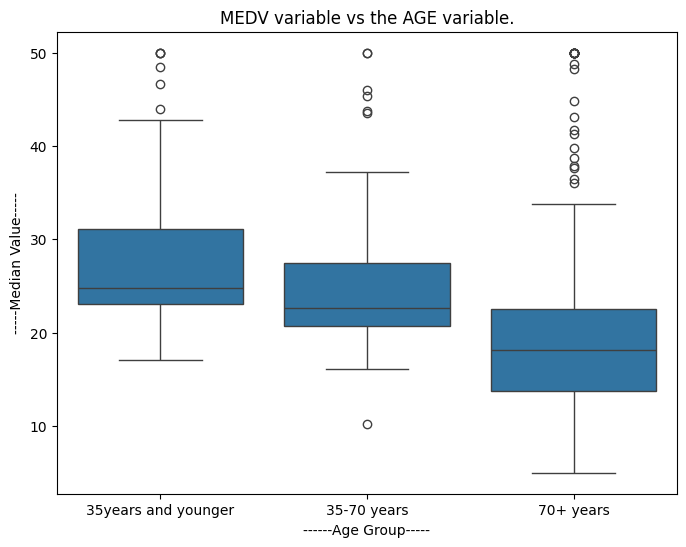

In [34]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston['AGE_GROUP'] = pd.cut(boston['AGE'], bins=[0,35,70,boston['AGE'].max()], labels = ['35years and younger','35-70 years','70+ years'])

plt.figure(figsize = (8,6))
sns.boxplot(x="AGE_GROUP",y="MEDV", data = boston)
plt.title('MEDV variable vs the AGE variable.')
plt.xlabel('------Age Group-----')
plt.ylabel('-----Median Value-----')
plt.show()

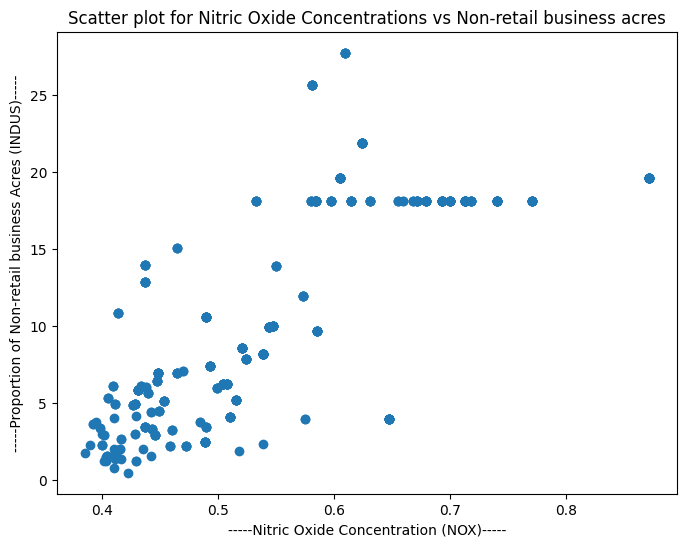

In [37]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

plt.figure(figsize = (8,6))
plt.scatter(boston['NOX'], boston['INDUS'])
plt.title('Scatter plot for Nitric Oxide Concentrations vs Non-retail business acres')
plt.xlabel('-----Nitric Oxide Concentration (NOX)-----')
plt.ylabel('-----Proportion of Non-retail business Acres (INDUS)-----')
plt.show()

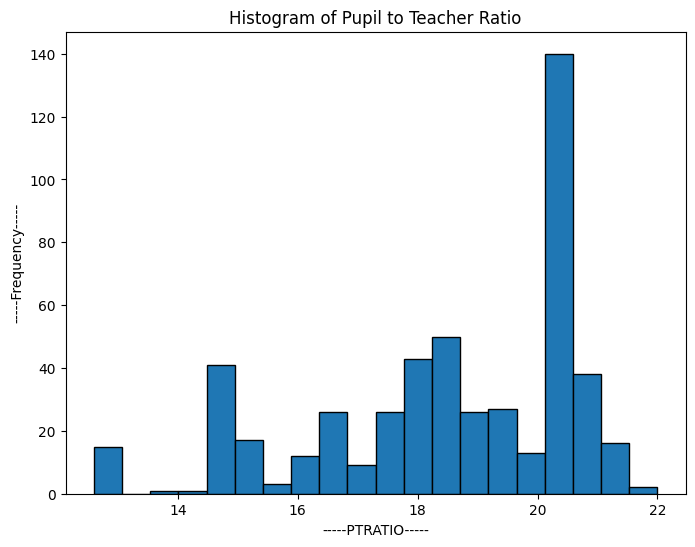

In [39]:
# create a histogram for the pupil to teacher ratio variable

plt.figure(figsize = (8,6))
plt.hist(boston['PTRATIO'], bins = 20, edgecolor = 'black')
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('-----PTRATIO-----')
plt.ylabel('-----Frequency-----')
plt.show()

# **Task 3: Use the appropriate tests to answer the questions provided**


In [43]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
